In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [4]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

23

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
numerical_col = df.columns[df.dtypes!='O']
categorical_col = df.columns[df.dtypes=='O']

In [10]:
numerical_col

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [11]:
categorical_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [12]:
df[numerical_col]

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
1,82,132870,9,0,4356,18,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0
5,34,216864,9,0,3770,45,0
6,38,150601,6,0,3770,40,0
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0
32557,27,257302,12,0,0,38,0
32558,40,154374,9,0,0,40,1
32559,58,151910,9,0,0,40,0


In [13]:
df[categorical_col]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [14]:
df[categorical_col].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,30139,30139,30139,30139,30139,30139,30139,30139
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22264,9834,14059,4034,12457,25912,20366,27487


In [15]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [16]:
df['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [17]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

In [18]:
df['occupation'].value_counts()

occupation
Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: count, dtype: int64

In [19]:
df['relationship'].value_counts()

relationship
Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-relative      889
Name: count, dtype: int64

In [20]:
df['race'].value_counts()

race
White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

In [21]:
df['sex'].value_counts()

sex
Male      20366
Female     9773
Name: count, dtype: int64

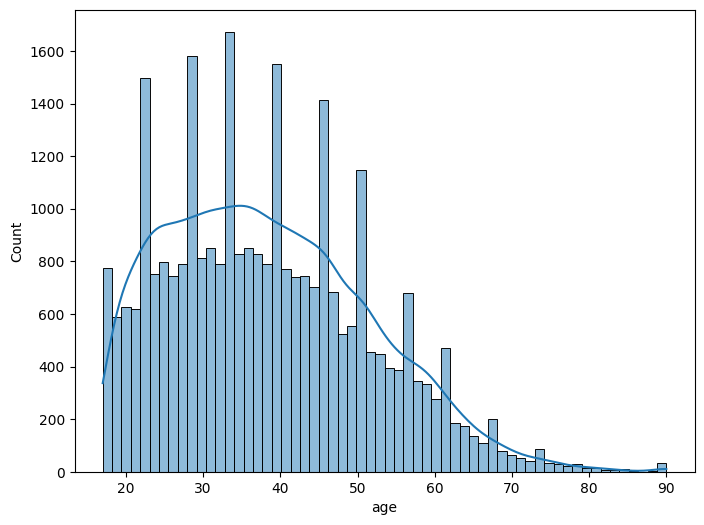

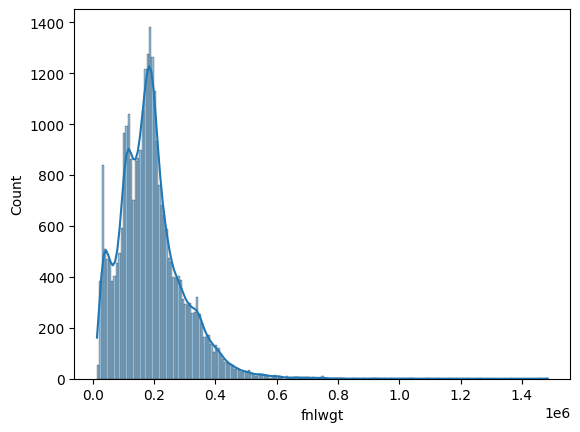

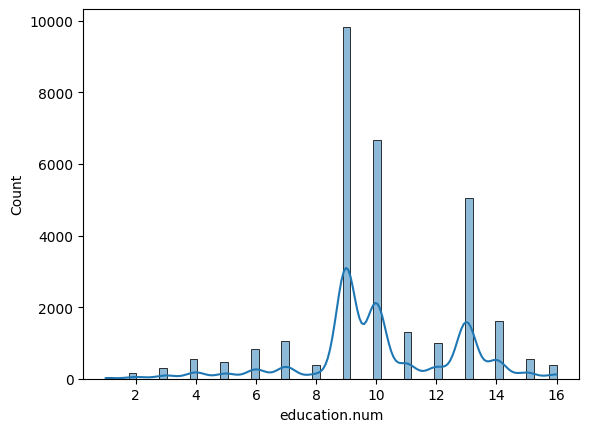

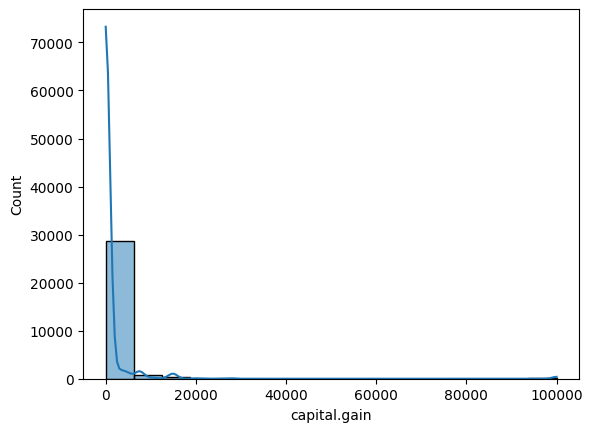

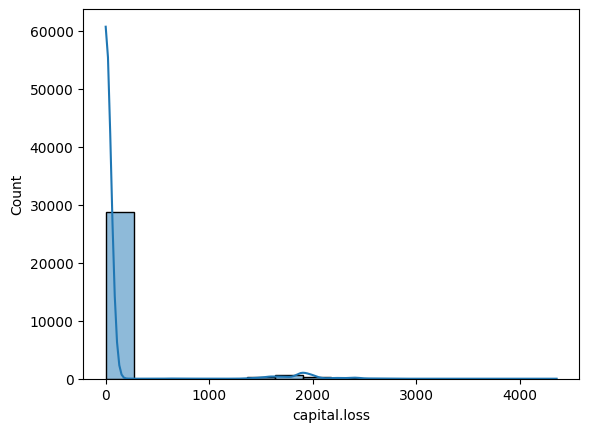

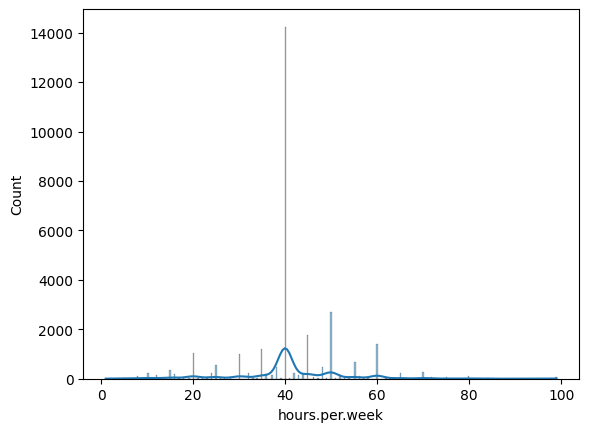

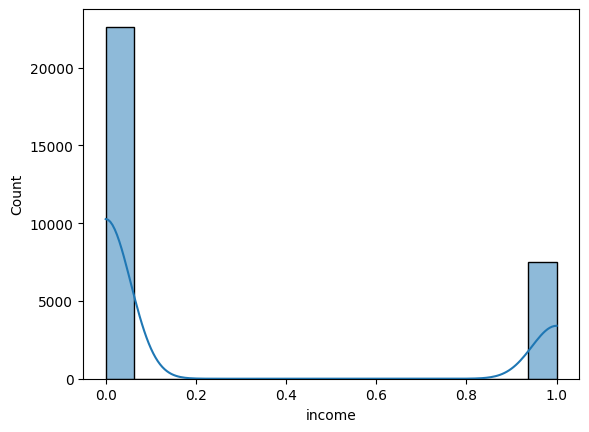

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_col:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

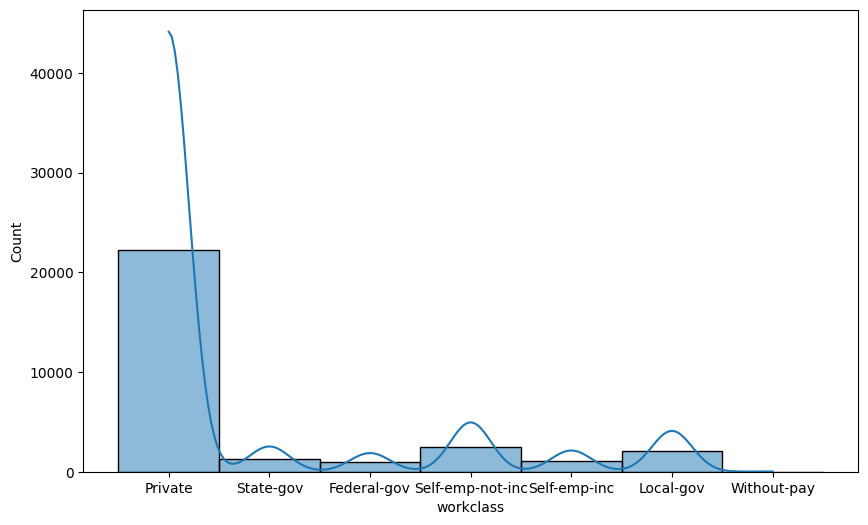

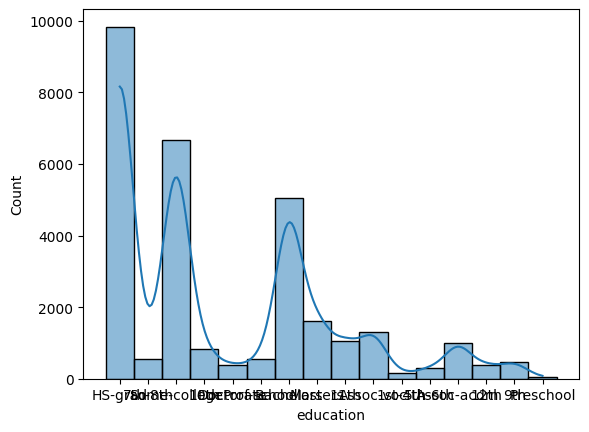

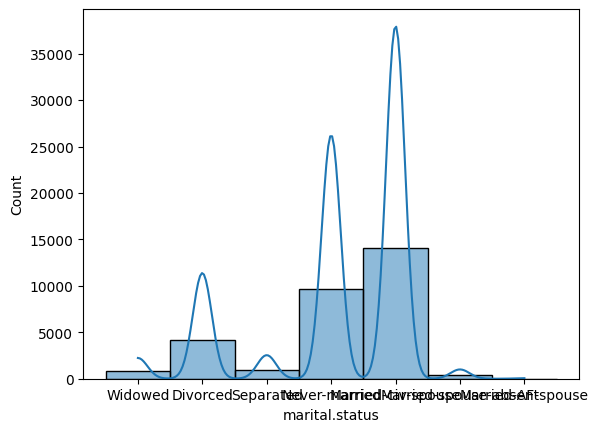

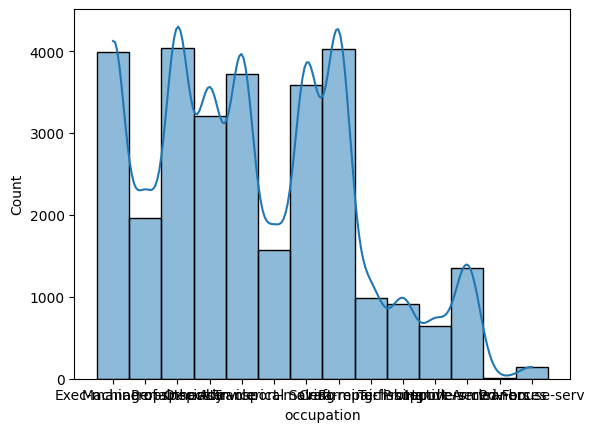

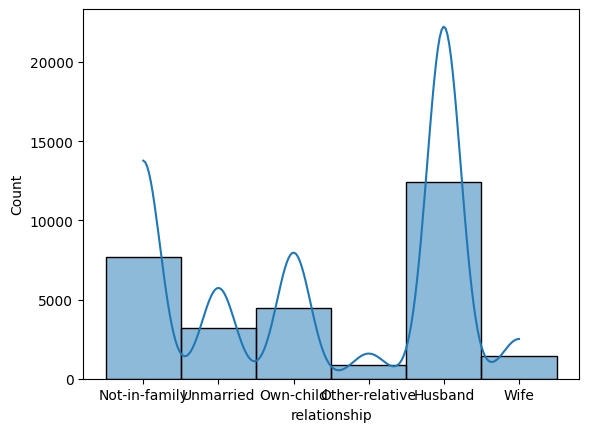

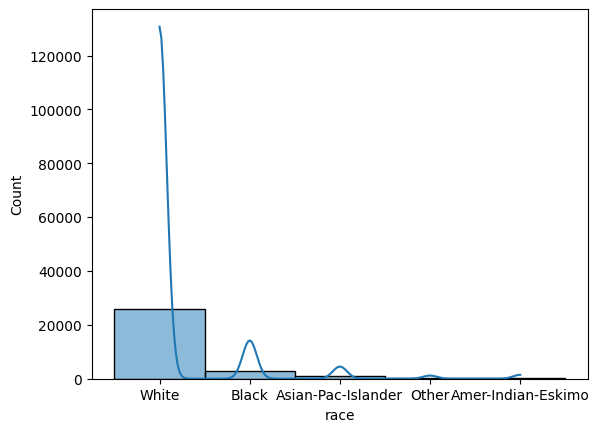

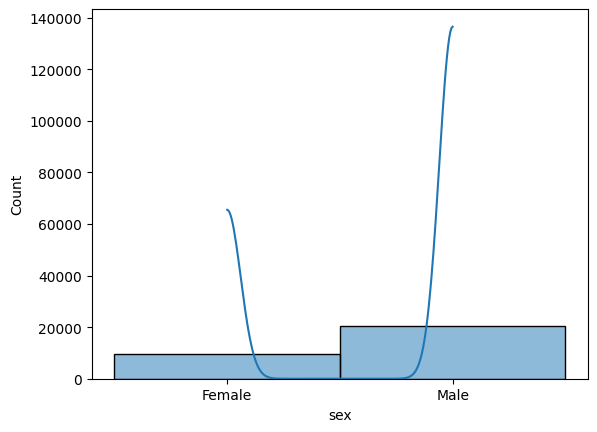

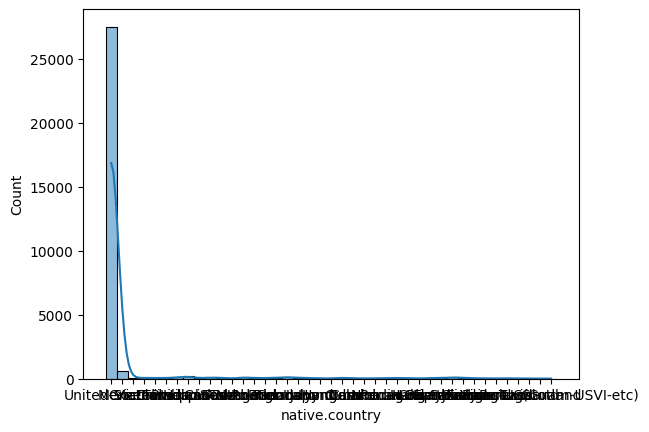

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
x=0
for i in categorical_col:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

<Axes: >

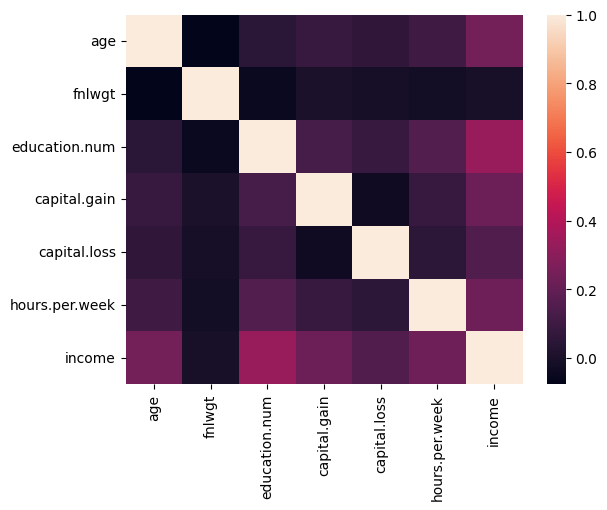

In [25]:
sns.heatmap(df[numerical_col].corr())

In [26]:
df[categorical_col]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [27]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [31]:
df['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

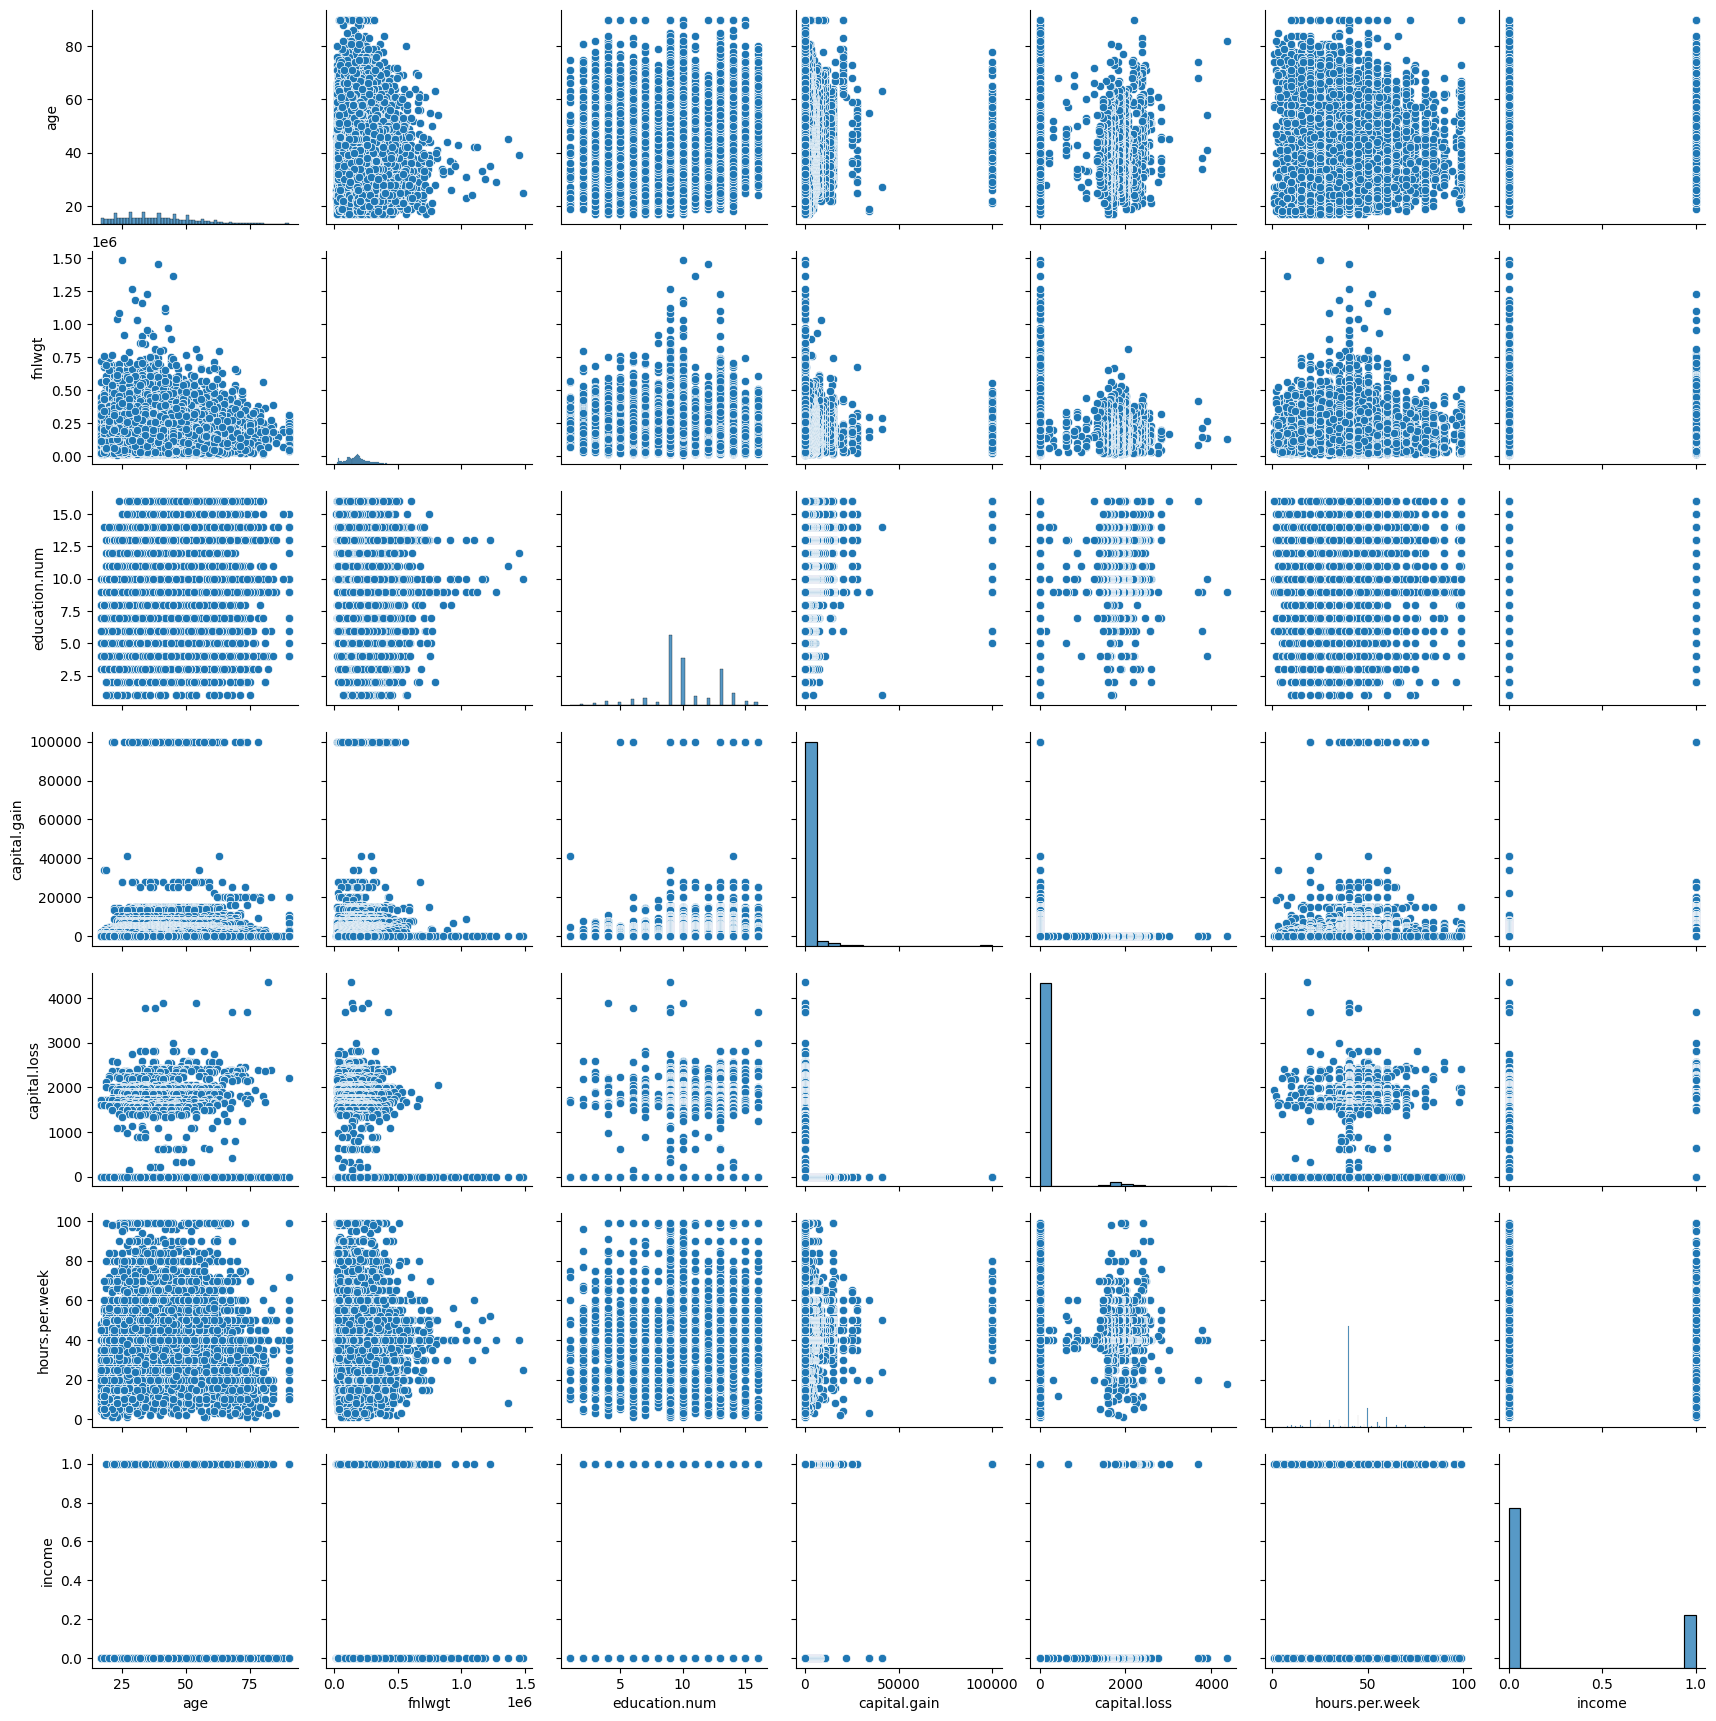

In [35]:
sns.pairplot(df)